In [1]:
import pandas as pd

train_df = pd.read_csv("train.csv")

train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [2]:
train_df.label.value_counts()

0    20109
1     1493
Name: label, dtype: int64

In [3]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2022-03-07 10:48:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.14MB/s    in 2m 42s  

2022-03-07 10:51:16 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [4]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [24]:
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'glove.6B.100d.txt')
words

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [25]:
len(words)

400000

In [26]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [28]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

message_to_token_list('@user feet a fathers is dysfunctional and is')

['user', 'foot', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [29]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [30]:
message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 100)

In [31]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(10584, 2268, 2269)

In [32]:
test_df

,id,label,tweet
12852,15257,1,the latest the blicqerâ¢ daily! thanks to @u...
12853,10199,0,happy father's day #fathersday #folklore @ f...
12854,12557,0,i am thankful for my job. #thankful #positive ...
12855,13776,0,@user a busy day for our chefs in the pastry ...
12856,13824,0,@user @user i think u hit the nail on the head...
...,...,...,...
15116,11770,0,mood of the day! â±âï¸ð³mood of the week...
15117,12352,0,feeling just as happy as this little guy! ð...
15118,6233,0,#orlando agreed it's worst for humanity #paki...
15119,5056,0,@user omg can't wait for the fosters to come b...


In [33]:
def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:
    message_as_vector_seq = message_to_word_vectors(message)
    
    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 100))

    all_word_vector_sequences.append(message_as_vector_seq)
  
  return all_word_vector_sequences, y

In [34]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

10584 16


In [35]:
print(len(X_train), len(X_train[2]))

10584 11


(array([1.652e+03, 3.252e+03, 2.724e+03, 2.084e+03, 7.340e+02, 1.310e+02,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  6.2, 11.4, 16.6, 21.8, 27. , 32.2, 37.4, 42.6, 47.8, 53. ]),
 <a list of 10 Patch objects>)

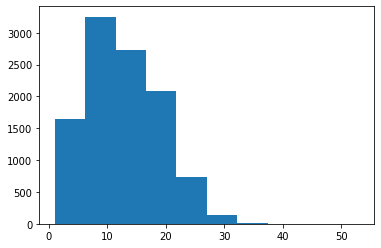

In [36]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [37]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 100))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [38]:
X_train = pad_X(X_train)

X_train.shape

(10584, 57, 100)

In [39]:
y_train.shape

(10584,)

In [40]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((2268, 57, 100), (2268,))

In [41]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((2269, 57, 100), (2269,))

In [50]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(57, 100)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 57, 64)            42240     
                                                                 
 dropout_6 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_7 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_8 (Dropout)         (None, 57, 64)            0         
                                                                 
 flatten_2 (Flatten)         (None, 3648)             

In [52]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])

In [53]:
frequencies = pd.value_counts(train_df['label'])

frequencies

0    9851
1     733
Name: label, dtype: int64

In [54]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: 1.07440868947315, 1: 14.439290586630287}

In [55]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
330/331 [============================>.] - ETA: 0s - loss: 1.0962 - accuracy: 0.6859 - auc: 0.7996

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


331/331 [==============================] - 43s 99ms/step - loss: 1.0949 - accuracy: 0.6863 - auc: 0.7998 - val_loss: 0.4418 - val_accuracy: 0.7954 - val_auc: 0.8592
Epoch 2/20
331/331 [==============================] - ETA: 0s - loss: 0.8342 - accuracy: 0.8125 - auc: 0.8908

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


331/331 [==============================] - 31s 95ms/step - loss: 0.8342 - accuracy: 0.8125 - auc: 0.8908 - val_loss: 0.3970 - val_accuracy: 0.8254 - val_auc: 0.8784
Epoch 3/20
331/331 [==============================] - 16s 47ms/step - loss: 0.7788 - accuracy: 0.8245 - auc: 0.9057 - val_loss: 0.4738 - val_accuracy: 0.7787 - val_auc: 0.8870
Epoch 4/20
330/331 [============================>.] - ETA: 0s - loss: 0.7315 - accuracy: 0.8360 - auc: 0.9172

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


331/331 [==============================] - 32s 97ms/step - loss: 0.7312 - accuracy: 0.8363 - auc: 0.9171 - val_loss: 0.2619 - val_accuracy: 0.8955 - val_auc: 0.8906
Epoch 5/20
331/331 [==============================] - 16s 47ms/step - loss: 0.7137 - accuracy: 0.8396 - auc: 0.9212 - val_loss: 0.3932 - val_accuracy: 0.8210 - val_auc: 0.8973
Epoch 6/20
331/331 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8467 - auc: 0.9259

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


331/331 [==============================] - 31s 94ms/step - loss: 0.6931 - accuracy: 0.8467 - auc: 0.9259 - val_loss: 0.2618 - val_accuracy: 0.8898 - val_auc: 0.9007
Epoch 7/20
331/331 [==============================] - 16s 47ms/step - loss: 0.6674 - accuracy: 0.8525 - auc: 0.9315 - val_loss: 0.3958 - val_accuracy: 0.8183 - val_auc: 0.9027
Epoch 8/20
330/331 [============================>.] - ETA: 0s - loss: 0.6478 - accuracy: 0.8497 - auc: 0.9352

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


331/331 [==============================] - 31s 95ms/step - loss: 0.6475 - accuracy: 0.8499 - auc: 0.9352 - val_loss: 0.2185 - val_accuracy: 0.9131 - val_auc: 0.9047
Epoch 9/20
331/331 [==============================] - 16s 47ms/step - loss: 0.6431 - accuracy: 0.8485 - auc: 0.9359 - val_loss: 0.3080 - val_accuracy: 0.8695 - val_auc: 0.9084
Epoch 10/20
331/331 [==============================] - 16s 48ms/step - loss: 0.6116 - accuracy: 0.8578 - auc: 0.9421 - val_loss: 0.3054 - val_accuracy: 0.8686 - val_auc: 0.9127
Epoch 11/20
331/331 [==============================] - 16s 48ms/step - loss: 0.6023 - accuracy: 0.8617 - auc: 0.9440 - val_loss: 0.2915 - val_accuracy: 0.8779 - val_auc: 0.9132
Epoch 12/20
331/331 [==============================] - 16s 47ms/step - loss: 0.5764 - accuracy: 0.8667 - auc: 0.9486 - val_loss: 0.3013 - val_accuracy: 0.8633 - val_auc: 0.9137
Epoch 13/20
331/331 [==============================] - 16s 48ms/step - loss: 0.5490 - accuracy: 0.8705 - auc: 0.9529 - val_loss:

In [56]:
from tensorflow.keras.models import load_model

best_model = load_model('model/')

In [57]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2122
           1       0.38      0.69      0.49       147

    accuracy                           0.91      2269
   macro avg       0.68      0.81      0.72      2269
weighted avg       0.94      0.91      0.92      2269

